# Bug in Resampler.nunique()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Load hours database
col_names = ['time_in', 'time_out', 'worker_id', 'w_type', 'w_type2', 'time_created', 'time_mod']
hours = pd.read_csv('hours.2016.09.16a.csv', header=None,
                    names=col_names,
                    parse_dates=[0, 1, 5, 6])

# Calculate duration
hours['duration'] = (hours['time_out'] - hours['time_in']) / np.timedelta64(1, 'h')

# Set index
hours.set_index('time_in', inplace=True)
hours.sort_index(inplace=True)

# Select only shifts lasting less than 6 hours
hours = hours[(hours['duration'] > 0.167) & (hours['duration'] < 8.)]

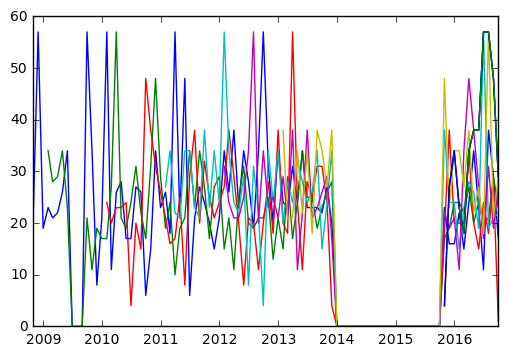

In [5]:
h = hours

u = []
for y in range(2008, 2017):
    h_slice = h[h.index > '{0:d}-01-01'.format(y)]
    u.append(h_slice['worker_id'].resample('M').nunique())

    plt.plot(u[-1].index, u[-1])

plt.show()